In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

## Understanding the data

In [4]:
# head
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# info
data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [6]:
# describe
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Preparation

### 1. Derive new features

We find all the columns related to recharge amount and recharge data.

In [7]:
recharge_col = data.columns[data.columns.str.contains('rech_amt|rech_data')]
recharge_col

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

From the above columns we can derive more information.

In [8]:
# checking for missing values
round(100 * data[recharge_col].isnull().sum()/len(data), 2).sort_values(ascending = False)

total_rech_data_6           74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
date_of_last_rech_data_8    73.66
total_rech_data_8           73.66
max_rech_data_8             73.66
av_rech_amt_data_8          73.66
total_rech_amt_7             0.00
max_rech_amt_9               0.00
max_rech_amt_8               0.00
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
total_rech_amt_6             0.00
dtype: float64

We can see that there is around 74% data missing.

In [9]:
data[recharge_col].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [10]:
for i in [a+b for b in ['_6', '_7', '_8', '_9'] for a in ['av_rech_amt_data', 'total_rech_data', 'max_rech_data']]:
    data[i].fillna(0, inplace = True)

In [11]:
# checking for missing values
round(100 * data[recharge_col].isnull().sum()/len(data), 2).sort_values(ascending = False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
total_rech_amt_6             0.00
total_rech_data_8            0.00
av_rech_amt_data_8           0.00
av_rech_amt_data_7           0.00
av_rech_amt_data_6           0.00
max_rech_data_9              0.00
max_rech_data_8              0.00
max_rech_data_7              0.00
max_rech_data_6              0.00
total_rech_data_9            0.00
total_rech_data_6            0.00
total_rech_data_7            0.00
total_rech_amt_7             0.00
max_rech_amt_9               0.00
max_rech_amt_8               0.00
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
av_rech_amt_data_9           0.00
dtype: float64

We drop the date columns since it cant be imputed as there was no recharge done.

In [12]:
data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], axis = 1, inplace=True)

In [13]:
# creating new feature Total recharge amount data
for i in range(6,10):
    data['total_rech_amt_data_'+str(i)] = round(data['av_rech_amt_data_'+str(i)] * data['total_rech_data_'+str(i)],2)

In [14]:
# calculating the total average recharge amount for the good phase(6 and 7 month)
data['total_av_rech_amt_6_7'] = (data.total_rech_amt_6 + data.total_rech_amt_data_6 + data.total_rech_amt_7 + data.total_rech_amt_data_7)/2

### 2. Filter high value customers

High value customers are those customers who have recharged with an amount more than or equal to the 70th percentile of the average recharge amount of the first two months i.e. good phase

In [15]:
# calculating the cutoff for high value customers
high_value_cutoff = data.total_av_rech_amt_6_7.quantile(0.7)
high_value_cutoff

478.0

In [16]:
hv_df = data[data.total_av_rech_amt_6_7 >= high_value_cutoff]

In [17]:
hv_df.shape

(30001, 227)

In [18]:
hv_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_av_rech_amt_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,

### 3. Tagging the churners

We tag the churn customers by based on the 4th month. Those who have not made any calls( incomming or outgoing) and have not used any data.


In [19]:
# creating a churn column
hv_df['churn'] = 0

In [20]:
# tagging the churn customers
hv_df['churn'] = hv_df.apply(lambda x : 1 if ((x.total_ic_mou_9 == 0) and (x.total_og_mou_9 == 0) and (x.vol_2g_mb_9 ==0) and (x.vol_3g_mb_9 ==0)) else 0, axis = 1)

In [21]:
# churn percentage
100*hv_df.churn.sum()/len(hv_df)

8.136395453484884

In [22]:
# remove the month 9 columns 
churn_month_col = hv_df.columns[hv_df.columns.str.contains('_9')]

In [23]:
# droping month 9 columns
hv_df.drop(churn_month_col, axis = 1, inplace = True)

In [24]:
hv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 174 entries, mobile_number to churn
dtypes: float64(140), int64(28), object(6)
memory usage: 40.1+ MB


In [25]:
hv_df.shape

(30001, 174)

## EDA

In [26]:
# renaming columns to naming format
hv_df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [27]:
# drop the month 9 related variables
hv_df.drop('vbc_3g_9', axis = 1, inplace = True)

In [28]:
#dropping the ID and date columns
hv_df.drop(['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'mobile_number',
             'circle_id'], axis = 1, inplace = True)

In [29]:
# unique values in columns
hv_df.nunique().sort_values()

loc_og_t2o_mou               1
std_ic_t2o_mou_8             1
std_ic_t2o_mou_6             1
std_og_t2c_mou_8             1
std_og_t2c_mou_7             1
std_og_t2c_mou_6             1
std_ic_t2o_mou_7             1
std_og_t2o_mou               1
loc_ic_t2o_mou               1
churn                        2
night_pck_user_8             2
night_pck_user_7             2
fb_user_7                    2
fb_user_8                    2
night_pck_user_6             2
fb_user_6                    2
monthly_2g_6                 5
monthly_2g_7                 6
monthly_2g_8                 6
monthly_3g_6                12
monthly_3g_8                12
monthly_3g_7                15
count_rech_3g_6             25
sachet_3g_6                 25
sachet_3g_7                 27
count_rech_3g_7             28
sachet_3g_8                 29
count_rech_3g_8             29
count_rech_2g_6             31
sachet_2g_6                 31
count_rech_2g_8             34
sachet_2g_8                 34
sachet_2

We drop the columns with single values, since they wont be useful in the analysis.

In [30]:
single_values = hv_df.nunique()

In [31]:
# list of single value columns
single_value_col = single_values.loc[single_values == 1].index
single_value_col

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [32]:
# dropping columns
hv_df.drop(single_value_col, axis = 1, inplace = True)

In [33]:
hv_df.shape

(30001, 156)

In [34]:
# create box plot for  6th, 7th and 8th month
def create_box_plots(attribute):
    plt.figure(figsize=(20,16))
    df = hv_df
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False)
    plt.show()

### Recharge related variables

In [35]:
rech_cols = hv_df.columns[hv_df.columns.str.contains('rech_amt|rech_data')]
list(rech_cols)

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8',
 'total_av_rech_amt_6_7']

In [36]:
# checking for missing values
round(100 * hv_df[rech_cols].isnull().sum()/len(hv_df), 2).sort_values(ascending = False)

total_rech_amt_6         0.0
max_rech_data_7          0.0
total_rech_amt_data_8    0.0
total_rech_amt_data_7    0.0
total_rech_amt_data_6    0.0
av_rech_amt_data_8       0.0
av_rech_amt_data_7       0.0
av_rech_amt_data_6       0.0
max_rech_data_8          0.0
max_rech_data_6          0.0
total_rech_amt_7         0.0
total_rech_data_8        0.0
total_rech_data_7        0.0
total_rech_data_6        0.0
max_rech_amt_8           0.0
max_rech_amt_7           0.0
max_rech_amt_6           0.0
total_rech_amt_8         0.0
total_av_rech_amt_6_7    0.0
dtype: float64

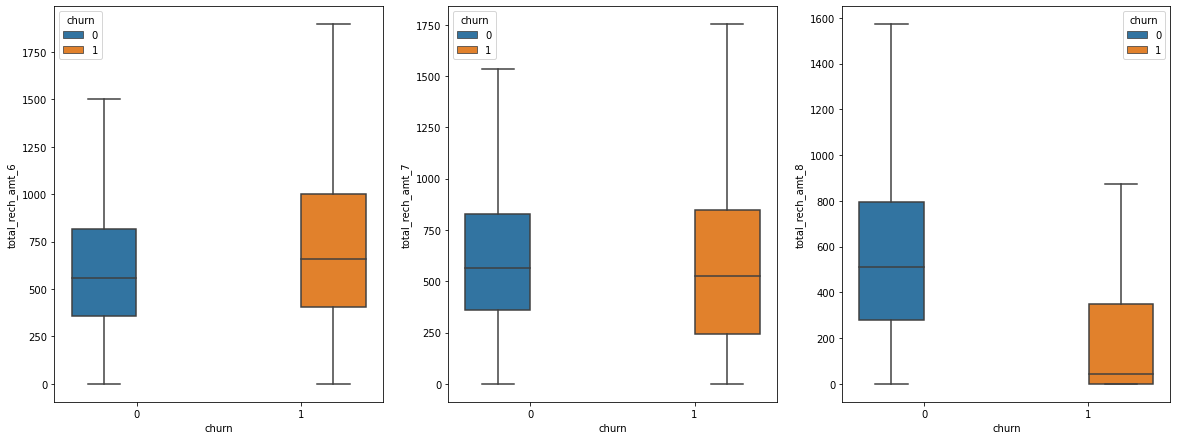

In [37]:
# box plot for total recharge amount
create_box_plots('total_rech_amt')

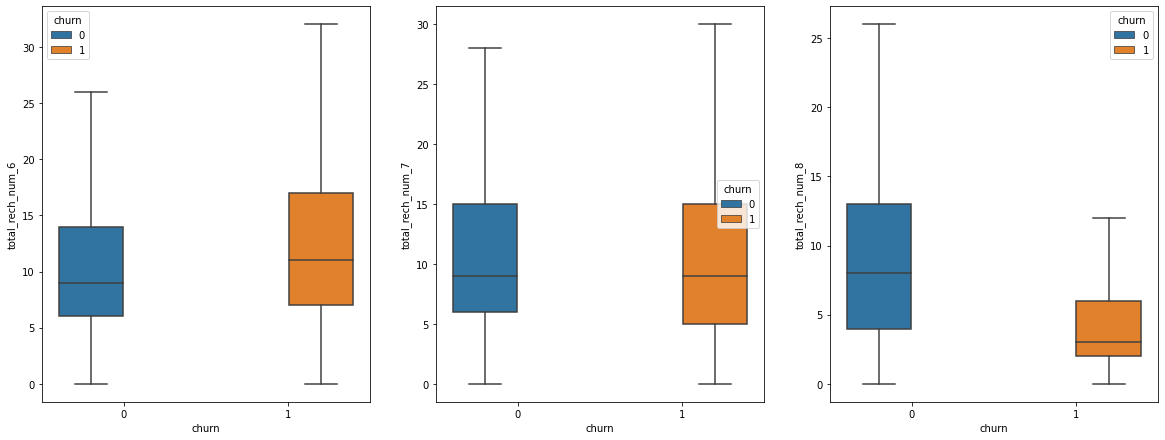

In [38]:
# box plot for total recharge number
create_box_plots('total_rech_num')

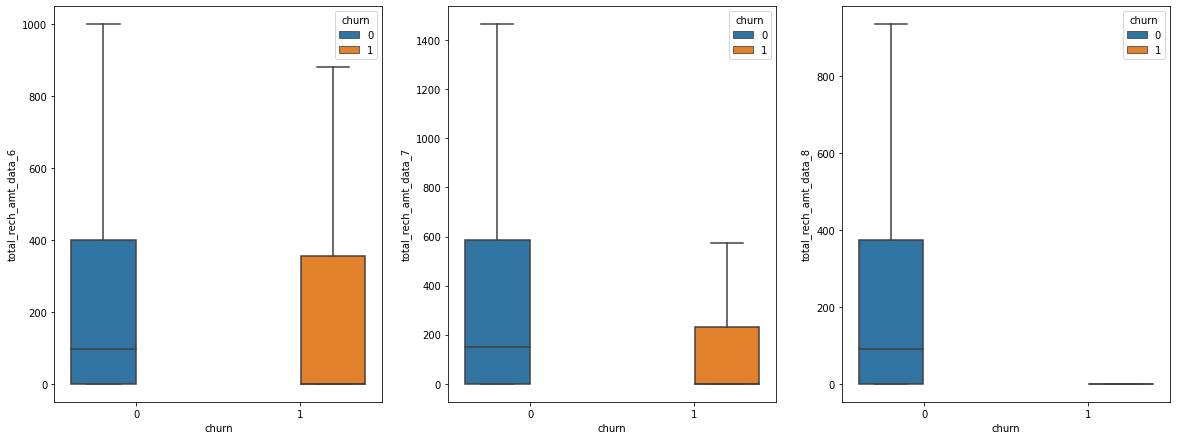

In [39]:
# box plot for total recharge amount data
create_box_plots('total_rech_amt_data')

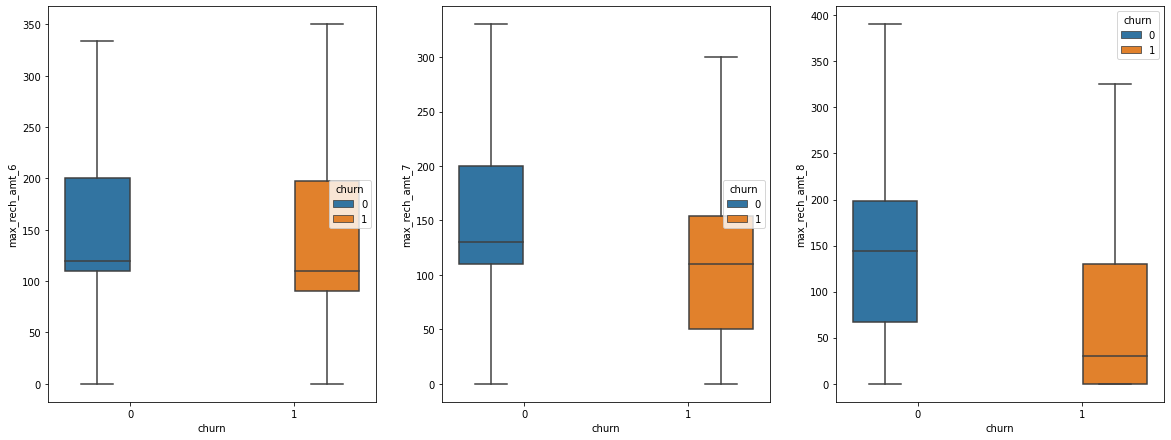

In [40]:
# box plot for max recharge amount
create_box_plots('max_rech_amt')

We can there is a drop in the recharge amount, data for churned customers in the 8th month.

### 2g/3g related variables

In [41]:
data_2g_3g_cols = hv_df.columns[hv_df.columns.str.contains('2g|3g')]
list(data_2g_3g_cols)

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'vbc_3g_8',
 'vbc_3g_7',
 'vbc_3g_6']

In [42]:
# checking for missing values
round(100 * hv_df[data_2g_3g_cols].isnull().sum()/len(hv_df), 2).sort_values(ascending = False)

count_rech_2g_8    46.83
arpu_2g_8          46.83
count_rech_3g_8    46.83
arpu_3g_8          46.83
count_rech_2g_6    44.15
arpu_3g_6          44.15
count_rech_3g_6    44.15
arpu_2g_6          44.15
count_rech_2g_7    43.15
arpu_3g_7          43.15
arpu_2g_7          43.15
count_rech_3g_7    43.15
vol_3g_mb_8         0.00
sachet_2g_8         0.00
vbc_3g_7            0.00
vbc_3g_8            0.00
sachet_3g_8         0.00
sachet_3g_7         0.00
sachet_3g_6         0.00
monthly_3g_8        0.00
monthly_3g_7        0.00
monthly_3g_6        0.00
sachet_2g_7         0.00
vol_3g_mb_7         0.00
sachet_2g_6         0.00
monthly_2g_8        0.00
monthly_2g_7        0.00
monthly_2g_6        0.00
vol_2g_mb_6         0.00
vol_2g_mb_7         0.00
vol_2g_mb_8         0.00
vol_3g_mb_6         0.00
vbc_3g_6            0.00
dtype: float64

In [43]:
hv_df[data_2g_3g_cols].describe()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,2.221175,2.457642,2.272676,0.764801,0.802955,0.777471,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,119.974696,120.695809,118.050972,113.585859,113.801227,109.817427,0.174494,0.183261,0.153628,1.066064,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,169.138860,178.872765,158.523962
std,3.005300,3.235315,3.112685,1.477739,1.617808,1.667737,330.530793,331.548010,313.384838,913.747778,915.525911,919.021056,226.092738,229.575385,218.941369,201.792701,206.066861,195.348610,0.434953,0.450423,0.406486,2.507197,2.736158,2.535940,0.613199,0.659125,0.617549,0.985674,1.089929,1.100107,420.974354,443.544138,416.734860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-26.040000,-24.490000,-15.320000,-15.480000,-24.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,15.480000,12.950000,10.020000,26.915000,24.000000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,83.450000,77.770000,51.650000,358.740000,410.700000,356.190000,177.787500,180.040000,179.490000,168.517500,166.910000,157.190000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128.800000,137.290000,98.440000
max,42.000000,48.000000,44.000000,29.000000,35.000000,45.000000,10285.900000,7873.550000,11117.610000,45735.400000,28144.120000,30036.060000,6362.280000,4980.900000,3716.900000,6433.760000,4809.360000,3467.170000,4.000000,5.000000,5.000000,42.000000,48.000000,44.000000,14.000000,16.000000,16.000000,29.000000,35.000000,41.000000,12916.220000,9165.600000,11166.210000


We have around 40% missing values in count of 2g/3g packs, average revenue per user 2g/3g. Since we have volume based data, we can drop these columns. 

In [44]:
hv_df.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
            ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'], axis = 1, inplace = True)

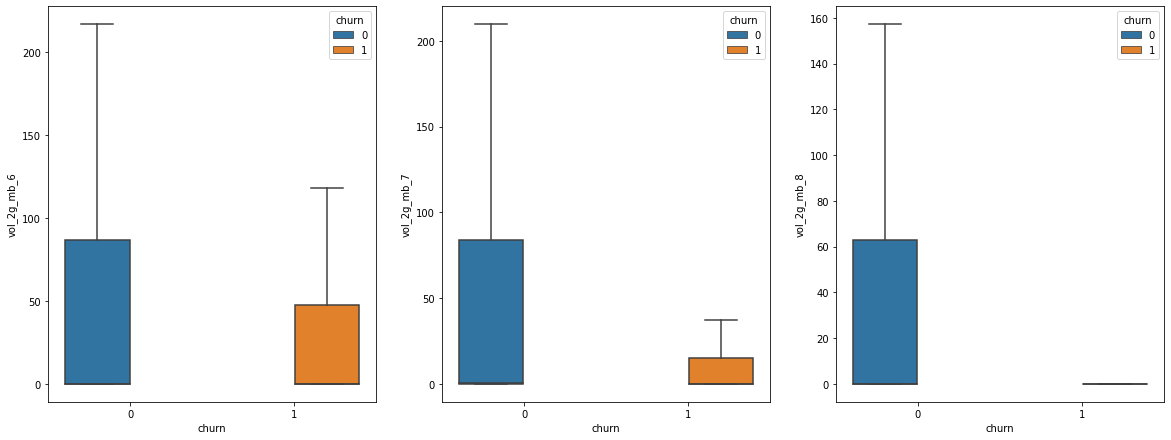

In [45]:
# box plot for 2g data
create_box_plots('vol_2g_mb')

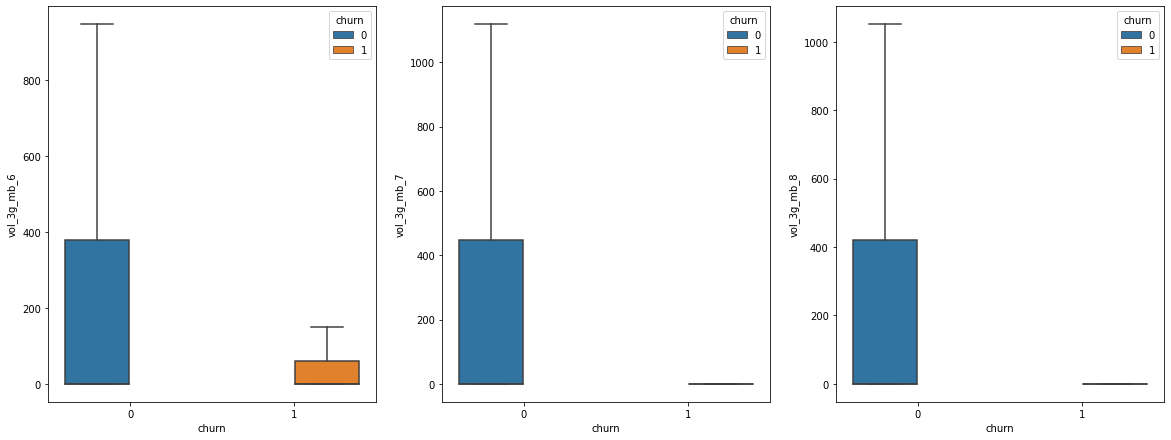

In [46]:
# box plot for 3g data
create_box_plots('vol_3g_mb')

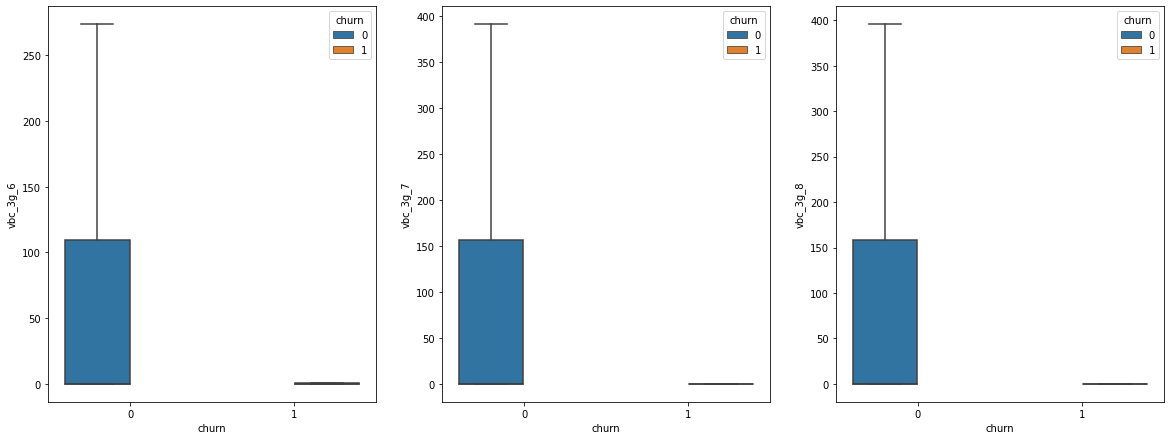

In [47]:
# box plot for vbc 3g data
create_box_plots('vbc_3g')

We can see that there is drop in data usage too in the 8th month for the churn customers

### Average revenue per user

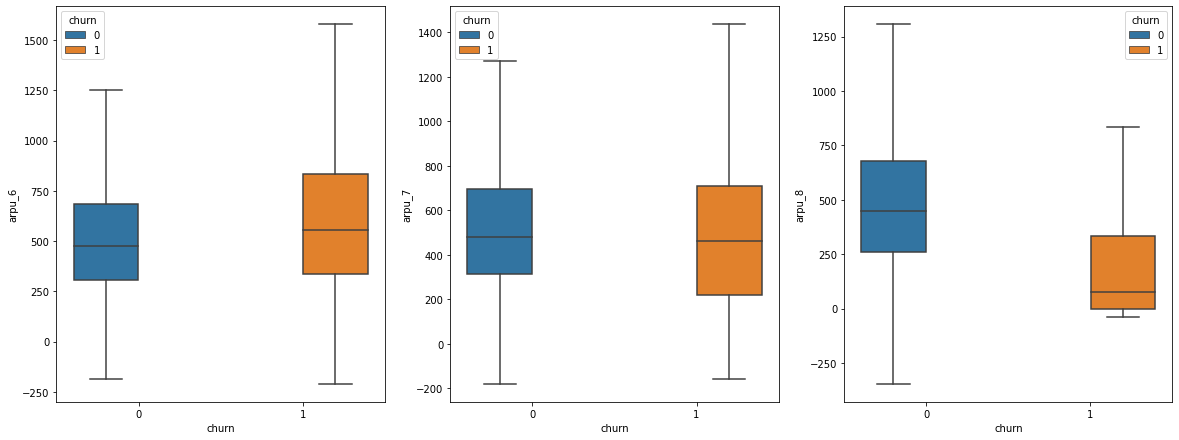

In [48]:
# box plot for arpu 
create_box_plots('arpu')

### Minutes of usage - voice calls

In [49]:
mou_cols = hv_df.columns[hv_df.columns.str.contains('mou')]
list(mou_cols)

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_i

In [50]:
# checking for missing values
round(100 * hv_df[mou_cols].isnull().sum()/len(hv_df), 2).sort_values(ascending = False)

isd_ic_mou_8        3.91
loc_ic_t2t_mou_8    3.91
loc_ic_t2m_mou_8    3.91
std_og_t2t_mou_8    3.91
loc_og_t2c_mou_8    3.91
loc_ic_t2f_mou_8    3.91
loc_og_t2f_mou_8    3.91
loc_ic_mou_8        3.91
std_og_mou_8        3.91
loc_og_t2m_mou_8    3.91
std_ic_t2t_mou_8    3.91
spl_og_mou_8        3.91
loc_og_t2t_mou_8    3.91
std_ic_t2m_mou_8    3.91
std_og_t2m_mou_8    3.91
roam_og_mou_8       3.91
std_ic_t2f_mou_8    3.91
roam_ic_mou_8       3.91
std_ic_mou_8        3.91
isd_og_mou_8        3.91
offnet_mou_8        3.91
spl_ic_mou_8        3.91
std_og_t2f_mou_8    3.91
onnet_mou_8         3.91
loc_og_mou_8        3.91
spl_og_mou_6        1.82
loc_ic_t2t_mou_6    1.82
std_ic_t2t_mou_6    1.82
loc_ic_t2m_mou_6    1.82
loc_ic_t2f_mou_6    1.82
loc_ic_mou_6        1.82
std_ic_t2m_mou_6    1.82
std_ic_t2f_mou_6    1.82
std_ic_mou_6        1.82
spl_ic_mou_6        1.82
isd_ic_mou_6        1.82
isd_og_mou_6        1.82
onnet_mou_6         1.82
roam_og_mou_6       1.82
std_og_t2m_mou_6    1.82


In [51]:
hv_df[mou_cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000
mean,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,12.872921,13.009645,27.063178,20.519370,20.674656,86.047905,87.235755,81.256858,166.263652,165.980922,157.937216,6.461494,6.540759,6.126112,1.604247,1.924320,1.777295,258.781428,259.765948,245.328371,168.954534,177.409496,154.486547,182.753296,191.345743,163.758261,1.836917,1.859332,1.649273,353.548540,370.618355,319.897555,2.211703,2.144122,2.028343,5.925921,7.238206,6.824251,609.866251,628.366047,551.678812,66.664313,67.851431,65.169653,153.195349,154.388675,152.188163,15.561152,16.327824,14.989754,235.430623,238.577812,232.357291,15.170365,15.702570,14.480350,29.735390,31.384277,29.059765,2.745734,2.849447,2.666308,47.655140,49.940010,46.209942,289.950496,296.756987,279.922931,0.062165,0.020125,0.027649,10.984229,12.09224,11.446169
std,462.493645,482.972367,465.200856,484.257474,500.807874,486.918550,76.973057,76.454034,75.575865,117.218920,96.933381,106.751862,230.609510,242.427257,231.399901,251.423301,242.754684,236.315181,22.310305,22.125961,19.858510,6.357757,9.238487,7.345047,380.226723,377.227177,367.505268,406.914141,424.347895,404.426554,412.056950,436.816512,416.088724,12.087212,13.095663,11.147419,612.382663,643.696568,618.022200,46.273483,45.957517,45.611669,17.711012,21.964629,20.677329,690.873430,717.219171,700.478180,165.002284,168.678411,161.602601,220.251819,219.252313,217.137562,46.125606,49.563887,44.078609,316.131788,317.260100,311.154100,78.384516,83.769752,72.720335,99.033833,106.540374,105.268386,19.272265,19.687849,20.291213,138.618986,149.355854,141.316476,365.523475,373.747232,361.175175,0.189605,0.183489,0.112796,77.421743,80.89052,71.988368
min,0.000000,0.000000,0.000000,0.00000

There is 3.91% of missing data, meaning the customer did not use the call service. So we can impute it with 0.

In [52]:
hv_df[mou_cols] = hv_df[mou_cols].replace(np.NaN, 0)

Columns total_og/ic_mou, std_og/ic_mou and loc_og/ic_mou are a linear combonation of other variables. So we can remove these from the dataset.

In [53]:
og_ic_cols = hv_df.columns[hv_df.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou|total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
og_ic_cols

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8'],
      dtype='object')

In [54]:
# dropping columns
hv_df.drop(og_ic_cols, axis = 1, inplace = True)

### Tenure of customer

<AxesSubplot:xlabel='aon', ylabel='Density'>

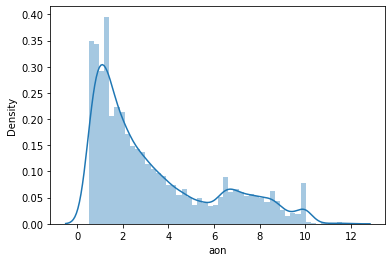

In [55]:
# dist plot for customer age on network by year
sns.distplot(hv_df['aon']/365)

We can see that most of the customers have been for 0-2 year on the network.

In [56]:
# checking for missing values
round(100 * hv_df.isnull().sum()/len(hv_df), 2).sort_values(ascending = False)

fb_user_8                46.83
night_pck_user_8         46.83
fb_user_6                44.15
night_pck_user_6         44.15
night_pck_user_7         43.15
fb_user_7                43.15
og_others_8               3.91
ic_others_8               3.91
ic_others_6               1.82
og_others_6               1.82
og_others_7               1.79
ic_others_7               1.79
arpu_6                    0.00
last_day_rch_amt_8        0.00
total_rech_data_7         0.00
total_rech_data_8         0.00
max_rech_data_6           0.00
max_rech_data_7           0.00
max_rech_data_8           0.00
total_rech_data_6         0.00
max_rech_amt_7            0.00
last_day_rch_amt_7        0.00
last_day_rch_amt_6        0.00
max_rech_amt_8            0.00
av_rech_amt_data_7        0.00
max_rech_amt_6            0.00
total_rech_amt_8          0.00
total_rech_amt_7          0.00
total_rech_amt_6          0.00
total_rech_num_8          0.00
total_rech_num_7          0.00
total_rech_num_6          0.00
isd_ic_m

We decide to drop columns greater than 30% missing values.

In [57]:
hv_df.drop(['fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_8', 'night_pck_user_7', 'night_pck_user_6'], axis = 1, inplace = True)

In [58]:
# checking for missing values
round(100 * hv_df.isnull().sum()/len(hv_df), 2).sort_values(ascending = False)

og_others_8              3.91
ic_others_8              3.91
ic_others_6              1.82
og_others_6              1.82
ic_others_7              1.79
og_others_7              1.79
arpu_6                   0.00
max_rech_data_6          0.00
total_rech_data_8        0.00
total_rech_data_7        0.00
total_rech_data_6        0.00
last_day_rch_amt_8       0.00
last_day_rch_amt_7       0.00
last_day_rch_amt_6       0.00
max_rech_amt_8           0.00
max_rech_amt_7           0.00
total_rech_amt_8         0.00
max_rech_amt_6           0.00
max_rech_data_8          0.00
total_rech_amt_7         0.00
total_rech_amt_6         0.00
total_rech_num_8         0.00
total_rech_num_7         0.00
total_rech_num_6         0.00
isd_ic_mou_8             0.00
isd_ic_mou_7             0.00
isd_ic_mou_6             0.00
spl_ic_mou_8             0.00
spl_ic_mou_7             0.00
max_rech_data_7          0.00
av_rech_amt_data_6       0.00
std_ic_t2f_mou_8         0.00
av_rech_amt_data_7       0.00
total_av_r

Replacing the missing values with 0 since the customer did not use the service.

In [59]:
hv_df.fillna(0, inplace = True)

In [60]:
# checking for missing values
hv_df.isnull().any().sum()

0

Now there are no missing values

In [61]:
# shape
hv_df.shape

(30001, 120)

In [62]:
churn_df = hv_df.copy()

In [63]:
# removing the temporary column 
churn_df.drop('total_av_rech_amt_6_7', axis = 1, inplace = True)

In [64]:
churn_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 119 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       float64
 2

We decide to merge the 6th and the 7th month columns by taking their average.

In [65]:
# merging the 6, 7 month columns
col_list = churn_df.filter(regex = '_6|_7').columns.str[:-2]

for i, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = col + '_avg67'
    col_6 = col+'_6'
    col_7 = col+'_7'
    churn_df[avg_col_name] = (churn_df[col_6] + churn_df[col_7])/2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [66]:
# dropping the 6 and 7 month columns
churn_df.drop(churn_df.filter(regex = '_6|_7'), axis = 1, inplace = True)

In [67]:
churn_df.shape

(30001, 80)

## Modeling

In [68]:
churn_pca = churn_df.copy()

In [69]:
# importing libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [70]:
# split X, y 
y = churn_pca['churn']
X = churn_pca.drop('churn', axis = 1)

In [71]:
# split train test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [72]:
# print shapes of train and test sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21000, 79)
(21000,)
(9001, 79)
(9001,)


In [73]:
# using SMOTE for data imbalance
smote = SMOTE()
x_tr,y_tr = smote.fit_resample(x_train,y_train)

In [74]:
print(x_tr.shape, y_tr.shape, sep = '\n')

(38582, 79)
(38582,)


### PCA 

In [75]:
# PCA
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(x_train)
churn_pca = pca.fit_transform(x_train)

In [76]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      10.36
1      19.77
2      26.23
3      31.00
4      34.99
5      38.47
6      41.71
7      44.80
8      47.70
9      50.49
10     53.08
11     55.52
12     57.83
13     60.08
14     62.21
15     64.22
16     66.04
17     67.77
18     69.44
19     71.09
20     72.69
21     74.18
22     75.60
23     76.93
24     78.24
25     79.40
26     80.51
27     81.59
28     82.63
29     83.61
30     84.56
31     85.49
32     86.40
33     87.28
34     88.11
35     88.89
36     89.58
37     90.22
38     90.84
39     91.41
40     91.96
41     92.50
42     92.99
43     93.41
44     93.81
45     94.20
46     94.58
47     94.95
48     95.29
49     95.63
50     95.97
51     96.29
52     96.60
53     96.90
54     97.18
55     97.45
56     97.72
57     97.98
58     98.23
59     98.45
60     98.67
61     98.88
62     99.07
63     99.25
64     99.41
65     99.54
66     99.65
67     99.75
68     99.85
69     99.90
70     99.93
71     99.97
72     99.99
73    100.00
74    100.00
75    100.00
76    100.00

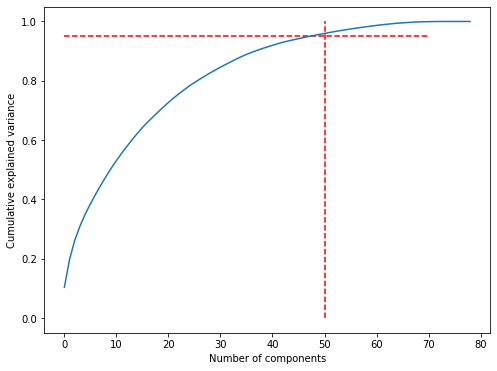

In [77]:
# scree plot
fig = plt.figure(figsize = (8,6))
plt.hlines(y = 0.95, xmax = 70, xmin = 0, colors= 'r', linestyle = '--')
plt.vlines(x = 50, ymax = 1, ymin = 0, colors= 'r', linestyle = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Around 50 components are enough to explain more than 95% of the variance in the dataset.

## PCA and Logistic  Regression Model

In [78]:
# create pipeline
pipeline_lr = Pipeline([('scaler', StandardScaler()),
                       ('pca', PCA(n_components = 60)),
                       ('logistic', LogisticRegression(class_weight='balanced'))])

In [79]:
# fit the model
pipeline_lr.fit(x_train, y_train)

# check score on train data
pipeline_lr.score(x_train, y_train)

0.8046666666666666

In [81]:
# predict churn on test data
y_pred = pipeline_lr.predict(x_test)

# create onfusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline_lr.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[6669 1600]
 [ 116  616]]
Sensitivity: 	0.84
Specificity: 	0.81
AUC:    	 0.9


We have generated a base model of logistic regression.

### Hyperparameter tuning - PCA and Logistic

In [82]:
pca_lr = Pipeline([('scaler', StandardScaler()),
                       ('pca', PCA()),
                       ('logistic', LogisticRegression(class_weight={0:0.1, 1: 0.9}))])

params = {'pca__n_components': [50, 60], 'logistic__C': [0.1, 0.5, 1, 2, 5, 10, 20], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)


# create gridsearch object
model = GridSearchCV(estimator=pca_lr, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [83]:
# fit model
model.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=21, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 5, 10, 20],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [50, 60]},
             scoring='roc_auc', verbose=1)

In [84]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.871914,0.056057,0.000000,0.000000,0.1,l1,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
1,1.101197,0.032393,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,1.356730,0.027257,0.033163,0.001682,0.1,l2,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.889329,0.883836,0.878259,0.872749,0.884834,0.881802,0.005736,14
3,1.430516,0.114454,0.036342,0.003267,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.893473,0.883764,0.884736,0.877958,0.891656,0.886318,0.005632,7
4,0.893045,0.022022,0.000000,0.000000,0.5,l1,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
5,1.101536,0.059464,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
6,1.333513,0.065363,0.035098,0.005698,0.5,l2,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.889803,0.883440,0.879607,0.872382,0.885245,0.882095,0.005860,12
7,1.513502,0.063453,0.034505,0.004248,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.893705,0.883046,0.885837,0.878638,0.891966,0.886639,0.005583,6
8,0.921146,0.058925,0.000000,0.000000,1,l1,50,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
9,1.177845,0.071225,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22


In [85]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8866613504966663
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [86]:
# predict churn on test data
y_pred = model.predict(x_test)

# create onfusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[6983 1286]
 [ 132  600]]
Sensitivity: 	0.82
Specificity: 	0.84
AUC:    	 0.9


## Tree Models

### Random Forest

In [87]:
# params
param_grid = {
    'n_estimators': [1000, 1300, 1500],
    'max_features': [0.4],
    "criterion": ['entropy']
}

# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Instantiate the grid search model
model_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

In [88]:
# Fit the grid search to the data
model_rf.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_features': [0.4],
                         'n_estimators': [1000, 1300, 1500]},
             scoring='roc_auc', verbose=1)

In [89]:
print('Best score : ', model_rf.best_score_)

Best score :  0.9279847224056879


In [90]:
print('Best parameters : ', model_rf.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_features': 0.4, 'n_estimators': 1300}


In [91]:
# predict churn on test data
y_pred = model_rf.predict(x_test)

# create onfusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_rf.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[8122  147]
 [ 366  366]]
Sensitivity: 	0.5
Specificity: 	0.98
AUC:    	 0.94


Poor sensitivity. The best model is PCA along with Logistic regression.

### XGBoost

In [92]:
# specify range of hyperparameters

param_grid = {'learning_rate': [0.1], 
             'subsample': [0.3,0.4,0.5],
             'n_estimator': [30, 50, 100]}  

# specify model
xgb_model = XGBClassifier(tree_method='gpu_hist')

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1)

In [98]:
# fit the model
model_cv.fit(x_tr, y_tr) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[21:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing...otone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
    

In [99]:
# cross validation results
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimator,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.034742,0.077721,0.044199,0.011356,0.1,30,0.3,"{'learning_rate': 0.1, 'n_estimator': 30, 'sub...",0.990972,0.990774,0.990688,0.990938,0.990170,0.990708,0.000289,7
1,12.288598,0.258479,0.038798,0.009363,0.1,30,0.4,"{'learning_rate': 0.1, 'n_estimator': 30, 'sub...",0.991337,0.991456,0.991494,0.990930,0.990474,0.991138,0.000388,4
2,12.479690,0.098986,0.035797,0.007832,0.1,30,0.5,"{'learning_rate': 0.1, 'n_estimator': 30, 'sub...",0.991155,0.991343,0.991796,0.991765,0.991271,0.991466,0.000264,1
3,11.792576,0.485354,0.035675,0.005794,0.1,50,0.3,"{'learning_rate': 0.1, 'n_estimator': 50, 'sub...",0.990972,0.990774,0.990688,0.990938,0.990170,0.990708,0.000289,7
4,12.124061,0.128011,0.037049,0.008063,0.1,50,0.4,"{'learning_rate': 0.1, 'n_estimator': 50, 'sub...",0.991337,0.991456,0.991494,0.990930,0.990474,0.991138,0.000388,4
5,12.256466,0.311357,0.045602,0.010520,0.1,50,0.5,"{'learning_rate': 0.1, 'n_estimator': 50, 'sub...",0.991155,0.991343,0.991796,0.991765,0.991271,0.991466,0.000264,1
6,11.843976,0.299053,0.033051,0.004672,0.1,100,0.3,"{'learning_rate': 0.1, 'n_estimator': 100, 'su...",0.990972,0.990774,0.990688,0.990938,0.990170,0.990708,0.000289,7
7,12.071378,0.147881,0.037678,0.009743,0.1,100,0.4,"{'learning_rate': 0.1, 'n_estimator': 100, 'su...",0.991337,0.991456,0.991494,0.990930,0.990474,0.991138,0.000388,4
8,7.970233,0.515875,0.025000,0.007654,0.1,100,0.5,"{'learning_rate': 0.1, 'n_estimator': 100, 'su...",0.991155,0.991343,0.991796,0.991765,0.991271,0.991466,0.000264,1


In [100]:
print('Best score : ', model_cv.best_score_)

Best score :  0.9914659838898918


In [101]:
print('Best Paramaters', model_cv.best_params_)

Best Paramaters {'learning_rate': 0.1, 'n_estimator': 30, 'subsample': 0.5}


In [102]:
# predict churn on test data
y_pred = model_cv.predict(x_test)

# create onfusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_cv.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[7877  392]
 [ 241  491]]
Sensitivity: 	0.67
Specificity: 	0.95
AUC:    	 0.92


The sensitivity if the XGboost model is also poor. So the best model is PCA with logistic regression.

## Important Features

In [103]:
# fit model on training data with default hyperparameters
xgb_model = XGBClassifier(n_estimator= 100, tree_method='gpu_hist', random_state=21, verbose=1)
xgb_model.fit(x_tr, y_tr)

[21:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=100, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbose=1, verbosity=None)

In [104]:
# predict churn on test data
y_pred = xgb_model.predict(x_test)

# create onfusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[7994  275]
 [ 307  425]]
Sensitivity: 	0.58
Specificity: 	0.97
AUC:    	 0.92


In [105]:
# importance
importance = xgb_model.feature_importances_

In [106]:
imp_features = pd.DataFrame(list(zip(x_train.columns,xgb_model.feature_importances_)), columns = ['Name', 'Score']).sort_values(by = 'Score',ascending = False)
imp_features

,Name,Score
16,loc_ic_t2m_mou_8,0.195500
4,roam_og_mou_8,0.113088
28,total_rech_data_8,0.066634
25,total_rech_amt_8,0.027884
33,monthly_2g_8,0.025600
21,spl_ic_mou_8,0.025409
27,last_day_rch_amt_8,0.025319
30,av_rech_amt_data_8,0.024722
29,max_rech_data_8,0.024137
76,sachet_3g_avg67,0.022116


In [107]:
top_features = imp_features[0:10]
top_features

,Name,Score
16,loc_ic_t2m_mou_8,0.195500
4,roam_og_mou_8,0.113088
28,total_rech_data_8,0.066634
25,total_rech_amt_8,0.027884
33,monthly_2g_8,0.025600
21,spl_ic_mou_8,0.025409
27,last_day_rch_amt_8,0.025319
30,av_rech_amt_data_8,0.024722
29,max_rech_data_8,0.024137
76,sachet_3g_avg67,0.022116


In [108]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_logistic = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [109]:
model_logistic.fit(x_train[top_features.Name], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10]},
             scoring='roc_auc', verbose=1)

In [111]:
# predict churn on test data
y_pred = model_logistic.predict(x_test[top_features.Name])

# create onfusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_logistic.predict_proba(x_test[top_features.Name])[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[6641 1628]
 [ 143  589]]
Sensitivity: 	0.8
Specificity: 	0.8
AUC:    	 0.88


In [112]:
logistic_model = model_logistic.best_estimator_.named_steps['logistic']

In [113]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [114]:
# coefficients
coefficients = logistic_model.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(x_train[top_features.Name].columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [115]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients.T

,0
intercept,-1.583272
loc_ic_t2m_mou_8,-1.919013
roam_og_mou_8,0.264050
total_rech_data_8,-0.957413
total_rech_amt_8,-0.608873
monthly_2g_8,-0.423721
spl_ic_mou_8,-0.251681
last_day_rch_amt_8,-0.410620
av_rech_amt_data_8,0.091183
max_rech_data_8,-0.259982


## Business Insights

All of the top features are of the action phase.

Churn happens when there is a drop in the usage in the action phase.

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 